### 1. Training a decision tree algorithm to determine wether to go to the cinema.

In [1]:
import pandas as pd

Include the information fromm the table to a DataFrame.

In [2]:
data = {
    'Age': [36, 42, 23, 52, 43, 44, 66, 35, 52, 35, 24, 18, 45],
    'Experience': [10, 12, 4, 4, 21, 14, 3, 14, 13, 5, 3, 3, 9],
    'Rank': [9, 4, 6, 4, 8, 5, 7, 9, 7, 9, 5, 7, 9],
    'Nationality': ['UK', 'USA', 'N', 'USA', 'USA', 'UK', 'N', 'UK', 'N', 'N', 'USA', 'UK', 'UK'],
    'Go': ['NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES']
}

In [3]:
df = pd.DataFrame(data)
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


To modify the text columns of the table, I will use Label Encoder to give it a number, so I can use it for the predictions.

In [4]:
from sklearn.preprocessing import LabelEncoder

Modify the "Go" column.

In [5]:
label_encoder = LabelEncoder()
df['Go'] = label_encoder.fit_transform(df['Go'])

Modify the "Nationality" column.

In [7]:
df['Nationality'] = label_encoder.fit_transform(df['Nationality'])

In [8]:
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,1,0
1,42,12,4,2,0
2,23,4,6,0,0
3,52,4,4,2,0
4,43,21,8,2,1
5,44,14,5,1,0
6,66,3,7,0,1
7,35,14,9,1,1
8,52,13,7,0,1
9,35,5,9,0,1


Define the "X" (independent variables) and "y" (variable column) columns for the prediction.

In [9]:
X = df[['Age', 'Experience', 'Rank', 'Nationality']]
y = df['Go'] 

Create the Decision Tree and use the impurity "Giny"

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Create the feature importance to check which from all the attributes the Dataframe has, has more impact on the colum I am trying to predict.

In [13]:
feature_importance = clf.feature_importances_

In [14]:
attribute_ranking = pd.DataFrame({
    'Attribute': ['Age', 'Experience', 'Rank', 'Nationality'],
    'Importance': feature_importance
})

Order the attributes by their impórtance.

In [15]:
attribute_ranking = attribute_ranking.sort_values(by='Importance', ascending=False)
attribute_ranking

,Attribute,Importance
2,Rank,0.729167
1,Experience,0.270833
0,Age,0.000000
3,Nationality,0.000000


The feature ranking method allowed me to understand which from all the features will impact more on a person to decide to "Go". In this case we can see the following: 
- The "Rank" is the best attribute to create the Split on the Decision Tree.
- The experience has less impact but still could affect on the Decision to go or not to go.
- Age and Nationality are not important at all.

### 2. Explain the corresponding ROC-AUC curve

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

For this example I will use the Wine dataset included in Python.

In [24]:
from sklearn.datasets import load_wine
data = load_wine()

Create the dataframe using the information from load_wine. Also create a new column which is going to be the feature I woulld like to predict.

In [25]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [26]:
df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Divide the data in train and test using Train Test Split.
- X: Are going to be all the columns except target
- y: Is going to only be the target column.

In [27]:
X = df.drop('target', axis=1)
y = df['target']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the Random Forest Model.

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Predict and calculate the ROC AUC curve.

In [32]:
y_prob = model.predict_proba(X_test)

First I will calculate the ROC.

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1], pos_label=1)

It is the moment to calculate the AUC.

In [36]:
auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f'AUC (One-vs-Rest): {auc}')

AUC (One-vs-Rest): 1.0


Plot the ROC curve for each class. (Using the True Positives and False Positives). If it is closer to 1 is good.

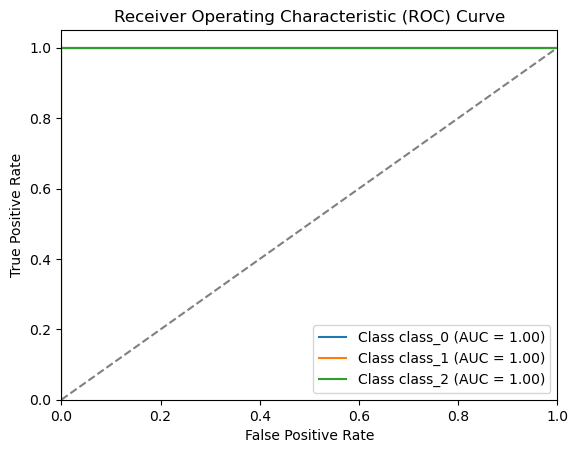

In [40]:
for i in range(len(data.target_names)):
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, i], pos_label=i)
    plt.plot(fpr, tpr, label=f'Class {data.target_names[i]} (AUC = {roc_auc_score(y_test == i, y_prob[:, i]):.2f})')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea sin habilidad

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

It has a perfect performance. All the classes are "1", this means that all the data is classified correctly.

### 3. Time Series and Model Evaluation

In [43]:
df_3 = pd.read_csv("C:/Users/jogea/Downloads/Task3_Data_TimeSeriesRegression.csv")
df_3.head()

,t,f(t)
0,0.479155,0.472010
1,-1.021461,37.567432
2,-4.467154,1507.309054
3,1.130598,5.036163
4,-1.007833,36.566910


Create the chart.

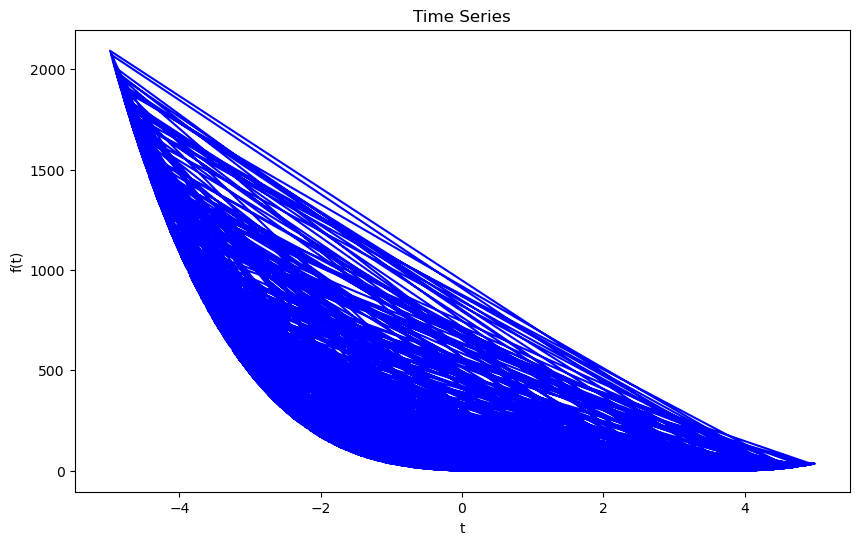

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(df_3['t'], df_3['f(t)'], label="f(t)", color='b')
plt.title('Time Series')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

In [45]:
from scipy.optimize import curve_fit

Define the exponential function.

In [46]:
def exp_func(t, a, b):
    return a * np.exp(b * t)

Adjust the model.

In [48]:
popt, _ = curve_fit(exp_func, df_3['t'], df_3['f(t)'], p0=(1, -0.5))

Plot the adjusted model.

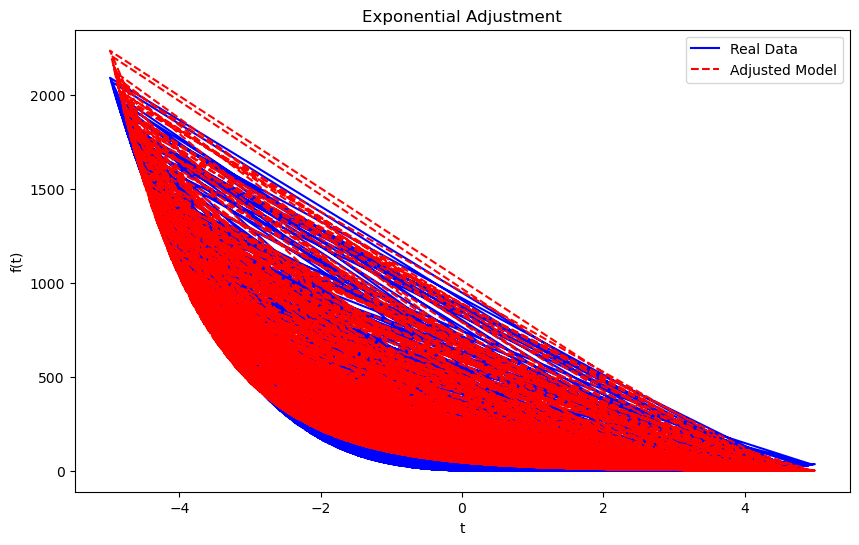

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(df_3['t'], df_3['f(t)'], label="Real Data", color='b')
plt.plot(df_3['t'], exp_func(df_3['t'], *popt), label="Adjusted Model", color='r', linestyle='--')
plt.title('Exponential Adjustment')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()

In [51]:
print(f'Model Parameters: a = {popt[0]}, b = {popt[1]}')

Model Parameters: a = 44.39993148677694, b = -0.7867902635629822


Finally, is time to evaluate the model.

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions adjusted model
predicciones = exp_func(df_3['t'], *popt)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(df_3['f(t)'], predicciones))
print(f'RMSE: {rmse}')

RMSE: 35.9874272578837


In [58]:
mse = mean_squared_error(df_3['f(t)'], predicciones)
print(f'MSE: {mse}')

MSE: 1295.0949206414707


The MSE is high, indicating some errors in the model's predictions, but the rest of the metrics should be considered as well.

In [59]:
mae = mean_absolute_error(df_3['f(t)'], predicciones)
print(f'MAE: {mae}')

MAE: 26.834991407388237


The MAE is low, this means that the model predictions are on average off by about 26.83 units, which suggests some accuracy.

In [60]:
r2 = r2_score(df_3['f(t)'], predicciones)
print(f'R²: {r2}')

R²: 0.9946142672172814


The R² value is very high, the model explains 99.46% of the data's variability. It is a great fit and high accuracy on the prediction.